In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../bank-additional-full.csv', sep=';')

y = df['y'].map({'yes': 1, 'no': 0})
X = df.drop('y', axis=1)

#finding categorical and numeric variables
categorical_cols = X.select_dtypes(include='object').columns
numeric_cols = X.select_dtypes(exclude='object').columns

print("Categorical columns:", categorical_cols)
print("Numeric columns:", numeric_cols)


Categorical columns: Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')
Numeric columns: Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')


In [4]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', 'passthrough', numeric_cols)
    ]
)


In [5]:
xgb = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=1,
    use_label_encoder=False
)


In [7]:
pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', xgb)
])

In [8]:
param_grid = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [3, 5, 7],
    'model__learning_rate': [0.01, 0.1],
    'model__subsample': [0.8, 1.0],
    'model__colsample_bytree': [0.8, 1.0]
}



In [9]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)



In [10]:
# Grid search with 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=2,
    scoring='roc_auc'
)

# Fit model
grid_search.fit(X_train, y_train)



Fitting 5 folds for each of 48 candidates, totalling 240 fits


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740:

[CV] END model__colsample_bytree=0.8, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=100, model__subsample=1.0; total time=   1.0s
[CV] END model__colsample_bytree=0.8, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=100, model__subsample=0.8; total time=   1.1s
[CV] END model__colsample_bytree=0.8, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=100, model__subsample=1.0; total time=   1.1s
[CV] END model__colsample_bytree=0.8, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=100, model__subsample=0.8; total time=   1.1s
[CV] END model__colsample_bytree=0.8, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=100, model__subsample=0.8; total time=   1.2s
[CV] END model__colsample_bytree=0.8, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=100, model__subsample=0.8; total time=   1.2s
[CV] END model__colsample_bytree=0.8, model__learning_rate=0.01, model__max_depth=3, model__n_

/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740:

[CV] END model__colsample_bytree=0.8, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=100, model__subsample=1.0; total time=   1.1s
[CV] END model__colsample_bytree=0.8, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=100, model__subsample=1.0; total time=   1.1s


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740:

[CV] END model__colsample_bytree=0.8, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=200, model__subsample=0.8; total time=   2.1s
[CV] END model__colsample_bytree=0.8, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=200, model__subsample=0.8; total time=   2.0s
[CV] END model__colsample_bytree=0.8, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=200, model__subsample=0.8; total time=   2.2s
[CV] END model__colsample_bytree=0.8, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=200, model__subsample=0.8; total time=   2.0s
[CV] END model__colsample_bytree=0.8, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=200, model__subsample=0.8; total time=   2.0s
[CV] END model__colsample_bytree=0.8, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=200, model__subsample=1.0; total time=   2.0s


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END model__colsample_bytree=0.8, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=200, model__subsample=1.0; total time=   1.8s
[CV] END model__colsample_bytree=0.8, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=200, model__subsample=1.0; total time=   1.8s


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740:

[CV] END model__colsample_bytree=0.8, model__learning_rate=0.01, model__max_depth=5, model__n_estimators=100, model__subsample=0.8; total time=   1.3s
[CV] END model__colsample_bytree=0.8, model__learning_rate=0.01, model__max_depth=5, model__n_estimators=100, model__subsample=0.8; total time=   1.3s
[CV] END model__colsample_bytree=0.8, model__learning_rate=0.01, model__max_depth=5, model__n_estimators=100, model__subsample=0.8; total time=   1.3s
[CV] END model__colsample_bytree=0.8, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=200, model__subsample=1.0; total time=   1.7s
[CV] END model__colsample_bytree=0.8, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=200, model__subsample=1.0; total time=   1.7s
[CV] END model__colsample_bytree=0.8, model__learning_rate=0.01, model__max_depth=5, model__n_estimators=100, model__subsample=0.8; total time=   1.4s
[CV] END model__colsample_bytree=0.8, model__learning_rate=0.01, model__max_depth=5, model__n_

/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740:

[CV] END model__colsample_bytree=0.8, model__learning_rate=0.01, model__max_depth=5, model__n_estimators=100, model__subsample=1.0; total time=   1.2s
[CV] END model__colsample_bytree=0.8, model__learning_rate=0.01, model__max_depth=5, model__n_estimators=100, model__subsample=1.0; total time=   1.1s
[CV] END model__colsample_bytree=0.8, model__learning_rate=0.01, model__max_depth=5, model__n_estimators=100, model__subsample=1.0; total time=   1.2s
[CV] END model__colsample_bytree=0.8, model__learning_rate=0.01, model__max_depth=5, model__n_estimators=100, model__subsample=1.0; total time=   1.2s


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740:

[CV] END model__colsample_bytree=0.8, model__learning_rate=0.01, model__max_depth=5, model__n_estimators=200, model__subsample=0.8; total time=   1.8s
[CV] END model__colsample_bytree=0.8, model__learning_rate=0.01, model__max_depth=5, model__n_estimators=200, model__subsample=0.8; total time=   1.7s
[CV] END model__colsample_bytree=0.8, model__learning_rate=0.01, model__max_depth=5, model__n_estimators=200, model__subsample=0.8; total time=   2.0s
[CV] END model__colsample_bytree=0.8, model__learning_rate=0.01, model__max_depth=5, model__n_estimators=200, model__subsample=0.8; total time=   1.7s


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740:

[CV] END model__colsample_bytree=0.8, model__learning_rate=0.01, model__max_depth=5, model__n_estimators=200, model__subsample=0.8; total time=   1.9s
[CV] END model__colsample_bytree=0.8, model__learning_rate=0.01, model__max_depth=5, model__n_estimators=200, model__subsample=1.0; total time=   1.9s
[CV] END model__colsample_bytree=0.8, model__learning_rate=0.01, model__max_depth=5, model__n_estimators=200, model__subsample=1.0; total time=   1.9s
[CV] END model__colsample_bytree=0.8, model__learning_rate=0.01, model__max_depth=5, model__n_estimators=200, model__subsample=1.0; total time=   1.9s
[CV] END model__colsample_bytree=0.8, model__learning_rate=0.01, model__max_depth=7, model__n_estimators=100, model__subsample=0.8; total time=   1.4s
[CV] END model__colsample_bytree=0.8, model__learning_rate=0.01, model__max_depth=7, model__n_estimators=100, model__subsample=0.8; total time=   1.5s


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740:

[CV] END model__colsample_bytree=0.8, model__learning_rate=0.01, model__max_depth=5, model__n_estimators=200, model__subsample=1.0; total time=   1.9s
[CV] END model__colsample_bytree=0.8, model__learning_rate=0.01, model__max_depth=5, model__n_estimators=200, model__subsample=1.0; total time=   2.1s


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740:

[CV] END model__colsample_bytree=0.8, model__learning_rate=0.01, model__max_depth=7, model__n_estimators=100, model__subsample=0.8; total time=   1.6s
[CV] END model__colsample_bytree=0.8, model__learning_rate=0.01, model__max_depth=7, model__n_estimators=100, model__subsample=0.8; total time=   1.4s
[CV] END model__colsample_bytree=0.8, model__learning_rate=0.01, model__max_depth=7, model__n_estimators=100, model__subsample=0.8; total time=   1.4s
[CV] END model__colsample_bytree=0.8, model__learning_rate=0.01, model__max_depth=7, model__n_estimators=100, model__subsample=1.0; total time=   1.5s
[CV] END model__colsample_bytree=0.8, model__learning_rate=0.01, model__max_depth=7, model__n_estimators=100, model__subsample=1.0; total time=   1.3s


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END model__colsample_bytree=0.8, model__learning_rate=0.01, model__max_depth=7, model__n_estimators=100, model__subsample=1.0; total time=   1.4s
[CV] END model__colsample_bytree=0.8, model__learning_rate=0.01, model__max_depth=7, model__n_estimators=100, model__subsample=1.0; total time=   1.4s
[CV] END model__colsample_bytree=0.8, model__learning_rate=0.01, model__max_depth=7, model__n_estimators=100, model__subsample=1.0; total time=   1.3s


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740:

[CV] END model__colsample_bytree=0.8, model__learning_rate=0.01, model__max_depth=7, model__n_estimators=200, model__subsample=0.8; total time=   2.3s
[CV] END model__colsample_bytree=0.8, model__learning_rate=0.01, model__max_depth=7, model__n_estimators=200, model__subsample=0.8; total time=   2.2s
[CV] END model__colsample_bytree=0.8, model__learning_rate=0.01, model__max_depth=7, model__n_estimators=200, model__subsample=0.8; total time=   2.3s
[CV] END model__colsample_bytree=0.8, model__learning_rate=0.01, model__max_depth=7, model__n_estimators=200, model__subsample=0.8; total time=   2.4s
[CV] END model__colsample_bytree=0.8, model__learning_rate=0.01, model__max_depth=7, model__n_estimators=200, model__subsample=0.8; total time=   2.5s
[CV] END model__colsample_bytree=0.8, model__learning_rate=0.01, model__max_depth=7, model__n_estimators=200, model__subsample=1.0; total time=   2.4s


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END model__colsample_bytree=0.8, model__learning_rate=0.01, model__max_depth=7, model__n_estimators=200, model__subsample=1.0; total time=   2.5s
[CV] END model__colsample_bytree=0.8, model__learning_rate=0.01, model__max_depth=7, model__n_estimators=200, model__subsample=1.0; total time=   2.6s


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740:

[CV] END model__colsample_bytree=0.8, model__learning_rate=0.1, model__max_depth=3, model__n_estimators=100, model__subsample=0.8; total time=   1.3s
[CV] END model__colsample_bytree=0.8, model__learning_rate=0.1, model__max_depth=3, model__n_estimators=100, model__subsample=0.8; total time=   1.1s
[CV] END model__colsample_bytree=0.8, model__learning_rate=0.1, model__max_depth=3, model__n_estimators=100, model__subsample=0.8; total time=   1.0s
[CV] END model__colsample_bytree=0.8, model__learning_rate=0.1, model__max_depth=3, model__n_estimators=100, model__subsample=0.8; total time=   1.1s


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END model__colsample_bytree=0.8, model__learning_rate=0.1, model__max_depth=3, model__n_estimators=100, model__subsample=0.8; total time=   1.1s


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END model__colsample_bytree=0.8, model__learning_rate=0.1, model__max_depth=3, model__n_estimators=100, model__subsample=1.0; total time=   1.4s


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END model__colsample_bytree=0.8, model__learning_rate=0.1, model__max_depth=3, model__n_estimators=100, model__subsample=1.0; total time=   1.4s
[CV] END model__colsample_bytree=0.8, model__learning_rate=0.1, model__max_depth=3, model__n_estimators=100, model__subsample=1.0; total time=   1.3s
[CV] END model__colsample_bytree=0.8, model__learning_rate=0.01, model__max_depth=7, model__n_estimators=200, model__subsample=1.0; total time=   3.0s
[CV] END model__colsample_bytree=0.8, model__learning_rate=0.01, model__max_depth=7, model__n_estimators=200, model__subsample=1.0; total time=   3.0s
[CV] END model__colsample_bytree=0.8, model__learning_rate=0.1, model__max_depth=3, model__n_estimators=100, model__subsample=1.0; total time=   1.2s
[CV] END model__colsample_bytree=0.8, model__learning_rate=0.1, model__max_depth=3, model__n_estimators=100, model__subsample=1.0; total time=   1.3s


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740:

[CV] END model__colsample_bytree=0.8, model__learning_rate=0.1, model__max_depth=3, model__n_estimators=200, model__subsample=0.8; total time=   1.8s
[CV] END model__colsample_bytree=0.8, model__learning_rate=0.1, model__max_depth=3, model__n_estimators=200, model__subsample=0.8; total time=   1.6s


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END model__colsample_bytree=0.8, model__learning_rate=0.1, model__max_depth=3, model__n_estimators=200, model__subsample=0.8; total time=   1.6s
[CV] END model__colsample_bytree=0.8, model__learning_rate=0.1, model__max_depth=3, model__n_estimators=200, model__subsample=1.0; total time=   1.4s
[CV] END model__colsample_bytree=0.8, model__learning_rate=0.1, model__max_depth=3, model__n_estimators=200, model__subsample=1.0; total time=   1.4s
[CV] END model__colsample_bytree=0.8, model__learning_rate=0.1, model__max_depth=3, model__n_estimators=200, model__subsample=0.8; total time=   1.7s


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END model__colsample_bytree=0.8, model__learning_rate=0.1, model__max_depth=3, model__n_estimators=200, model__subsample=1.0; total time=   1.3s
[CV] END model__colsample_bytree=0.8, model__learning_rate=0.1, model__max_depth=3, model__n_estimators=200, model__subsample=0.8; total time=   1.7s


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740:

[CV] END model__colsample_bytree=0.8, model__learning_rate=0.1, model__max_depth=3, model__n_estimators=200, model__subsample=1.0; total time=   1.4s
[CV] END model__colsample_bytree=0.8, model__learning_rate=0.1, model__max_depth=3, model__n_estimators=200, model__subsample=1.0; total time=   1.4s
[CV] END model__colsample_bytree=0.8, model__learning_rate=0.1, model__max_depth=5, model__n_estimators=100, model__subsample=0.8; total time=   1.2s


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END model__colsample_bytree=0.8, model__learning_rate=0.1, model__max_depth=5, model__n_estimators=100, model__subsample=0.8; total time=   1.3s
[CV] END model__colsample_bytree=0.8, model__learning_rate=0.1, model__max_depth=5, model__n_estimators=100, model__subsample=1.0; total time=   1.2s
[CV] END model__colsample_bytree=0.8, model__learning_rate=0.1, model__max_depth=5, model__n_estimators=100, model__subsample=0.8; total time=   1.3s
[CV] END model__colsample_bytree=0.8, model__learning_rate=0.1, model__max_depth=5, model__n_estimators=100, model__subsample=0.8; total time=   1.3s
[CV] END model__colsample_bytree=0.8, model__learning_rate=0.1, model__max_depth=5, model__n_estimators=100, model__subsample=0.8; total time=   1.3s


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740:

[CV] END model__colsample_bytree=0.8, model__learning_rate=0.1, model__max_depth=5, model__n_estimators=100, model__subsample=1.0; total time=   1.1s


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END model__colsample_bytree=0.8, model__learning_rate=0.1, model__max_depth=5, model__n_estimators=100, model__subsample=1.0; total time=   1.2s
[CV] END model__colsample_bytree=0.8, model__learning_rate=0.1, model__max_depth=5, model__n_estimators=100, model__subsample=1.0; total time=   1.2s
[CV] END model__colsample_bytree=0.8, model__learning_rate=0.1, model__max_depth=5, model__n_estimators=100, model__subsample=1.0; total time=   1.0s


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740:

[CV] END model__colsample_bytree=0.8, model__learning_rate=0.1, model__max_depth=5, model__n_estimators=200, model__subsample=0.8; total time=   1.8s
[CV] END model__colsample_bytree=0.8, model__learning_rate=0.1, model__max_depth=5, model__n_estimators=200, model__subsample=0.8; total time=   1.9s
[CV] END model__colsample_bytree=0.8, model__learning_rate=0.1, model__max_depth=5, model__n_estimators=200, model__subsample=0.8; total time=   1.9s
[CV] END model__colsample_bytree=0.8, model__learning_rate=0.1, model__max_depth=5, model__n_estimators=200, model__subsample=0.8; total time=   1.9s


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END model__colsample_bytree=0.8, model__learning_rate=0.1, model__max_depth=5, model__n_estimators=200, model__subsample=0.8; total time=   2.0s
[CV] END model__colsample_bytree=0.8, model__learning_rate=0.1, model__max_depth=5, model__n_estimators=200, model__subsample=1.0; total time=   1.7s
[CV] END model__colsample_bytree=0.8, model__learning_rate=0.1, model__max_depth=5, model__n_estimators=200, model__subsample=1.0; total time=   1.8s


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END model__colsample_bytree=0.8, model__learning_rate=0.1, model__max_depth=5, model__n_estimators=200, model__subsample=1.0; total time=   1.8s


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END model__colsample_bytree=0.8, model__learning_rate=0.1, model__max_depth=7, model__n_estimators=100, model__subsample=0.8; total time=   1.5s
[CV] END model__colsample_bytree=0.8, model__learning_rate=0.1, model__max_depth=7, model__n_estimators=100, model__subsample=0.8; total time=   1.4s
[CV] END model__colsample_bytree=0.8, model__learning_rate=0.1, model__max_depth=5, model__n_estimators=200, model__subsample=1.0; total time=   1.8s
[CV] END model__colsample_bytree=0.8, model__learning_rate=0.1, model__max_depth=5, model__n_estimators=200, model__subsample=1.0; total time=   1.8s


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END model__colsample_bytree=0.8, model__learning_rate=0.1, model__max_depth=7, model__n_estimators=100, model__subsample=0.8; total time=   1.3s
[CV] END model__colsample_bytree=0.8, model__learning_rate=0.1, model__max_depth=7, model__n_estimators=100, model__subsample=0.8; total time=   1.3s
[CV] END model__colsample_bytree=0.8, model__learning_rate=0.1, model__max_depth=7, model__n_estimators=100, model__subsample=0.8; total time=   1.5s


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740:

[CV] END model__colsample_bytree=0.8, model__learning_rate=0.1, model__max_depth=7, model__n_estimators=100, model__subsample=1.0; total time=   1.9s
[CV] END model__colsample_bytree=0.8, model__learning_rate=0.1, model__max_depth=7, model__n_estimators=100, model__subsample=1.0; total time=   1.3s
[CV] END model__colsample_bytree=0.8, model__learning_rate=0.1, model__max_depth=7, model__n_estimators=100, model__subsample=1.0; total time=   1.5s
[CV] END model__colsample_bytree=0.8, model__learning_rate=0.1, model__max_depth=7, model__n_estimators=100, model__subsample=1.0; total time=   1.5s
[CV] END model__colsample_bytree=0.8, model__learning_rate=0.1, model__max_depth=7, model__n_estimators=100, model__subsample=1.0; total time=   1.5s


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740:

[CV] END model__colsample_bytree=0.8, model__learning_rate=0.1, model__max_depth=7, model__n_estimators=200, model__subsample=0.8; total time=   2.5s
[CV] END model__colsample_bytree=0.8, model__learning_rate=0.1, model__max_depth=7, model__n_estimators=200, model__subsample=0.8; total time=   2.4s
[CV] END model__colsample_bytree=0.8, model__learning_rate=0.1, model__max_depth=7, model__n_estimators=200, model__subsample=0.8; total time=   2.4s


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END model__colsample_bytree=0.8, model__learning_rate=0.1, model__max_depth=7, model__n_estimators=200, model__subsample=0.8; total time=   2.4s
[CV] END model__colsample_bytree=0.8, model__learning_rate=0.1, model__max_depth=7, model__n_estimators=200, model__subsample=1.0; total time=   2.3s
[CV] END model__colsample_bytree=0.8, model__learning_rate=0.1, model__max_depth=7, model__n_estimators=200, model__subsample=0.8; total time=   2.4s
[CV] END model__colsample_bytree=1.0, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=100, model__subsample=0.8; total time=   1.0s
[CV] END model__colsample_bytree=0.8, model__learning_rate=0.1, model__max_depth=7, model__n_estimators=200, model__subsample=1.0; total time=   2.2s
[CV] END model__colsample_bytree=0.8, model__learning_rate=0.1, model__max_depth=7, model__n_estimators=200, model__subsample=1.0; total time=   2.2s


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740:

[CV] END model__colsample_bytree=1.0, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=100, model__subsample=0.8; total time=   1.0s
[CV] END model__colsample_bytree=1.0, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=100, model__subsample=0.8; total time=   1.0s
[CV] END model__colsample_bytree=1.0, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=100, model__subsample=0.8; total time=   1.0s
[CV] END model__colsample_bytree=0.8, model__learning_rate=0.1, model__max_depth=7, model__n_estimators=200, model__subsample=1.0; total time=   2.1s
[CV] END model__colsample_bytree=1.0, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=100, model__subsample=1.0; total time=   1.0s
[CV] END model__colsample_bytree=1.0, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=100, model__subsample=0.8; total time=   1.1s
[CV] END model__colsample_bytree=1.0, model__learning_rate=0.01, model__max_depth=3, model__n_e

/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740:

[CV] END model__colsample_bytree=1.0, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=100, model__subsample=1.0; total time=   1.0s
[CV] END model__colsample_bytree=1.0, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=100, model__subsample=1.0; total time=   0.9s
[CV] END model__colsample_bytree=1.0, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=100, model__subsample=1.0; total time=   1.0s


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END model__colsample_bytree=1.0, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=200, model__subsample=0.8; total time=   1.4s
[CV] END model__colsample_bytree=1.0, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=200, model__subsample=0.8; total time=   1.4s
[CV] END model__colsample_bytree=1.0, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=200, model__subsample=0.8; total time=   1.4s
[CV] END model__colsample_bytree=1.0, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=200, model__subsample=0.8; total time=   1.4s
[CV] END model__colsample_bytree=1.0, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=200, model__subsample=0.8; total time=   1.4s


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740:

[CV] END model__colsample_bytree=1.0, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=200, model__subsample=1.0; total time=   1.4s
[CV] END model__colsample_bytree=1.0, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=200, model__subsample=1.0; total time=   1.6s
[CV] END model__colsample_bytree=1.0, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=200, model__subsample=1.0; total time=   1.6s
[CV] END model__colsample_bytree=1.0, model__learning_rate=0.01, model__max_depth=5, model__n_estimators=100, model__subsample=0.8; total time=   1.0s


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END model__colsample_bytree=1.0, model__learning_rate=0.01, model__max_depth=5, model__n_estimators=100, model__subsample=0.8; total time=   1.3s
[CV] END model__colsample_bytree=1.0, model__learning_rate=0.01, model__max_depth=5, model__n_estimators=100, model__subsample=0.8; total time=   1.2s
[CV] END model__colsample_bytree=1.0, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=200, model__subsample=1.0; total time=   1.4s
[CV] END model__colsample_bytree=1.0, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=200, model__subsample=1.0; total time=   1.5s


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740:

[CV] END model__colsample_bytree=1.0, model__learning_rate=0.01, model__max_depth=5, model__n_estimators=100, model__subsample=0.8; total time=   1.3s


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END model__colsample_bytree=1.0, model__learning_rate=0.01, model__max_depth=5, model__n_estimators=100, model__subsample=1.0; total time=   1.3s
[CV] END model__colsample_bytree=1.0, model__learning_rate=0.01, model__max_depth=5, model__n_estimators=100, model__subsample=1.0; total time=   1.4s
[CV] END model__colsample_bytree=1.0, model__learning_rate=0.01, model__max_depth=5, model__n_estimators=100, model__subsample=1.0; total time=   1.3s
[CV] END model__colsample_bytree=1.0, model__learning_rate=0.01, model__max_depth=5, model__n_estimators=100, model__subsample=0.8; total time=   1.6s
[CV] END model__colsample_bytree=1.0, model__learning_rate=0.01, model__max_depth=5, model__n_estimators=100, model__subsample=1.0; total time=   1.2s
[CV] END model__colsample_bytree=1.0, model__learning_rate=0.01, model__max_depth=5, model__n_estimators=100, model__subsample=1.0; total time=   1.2s


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740:

[CV] END model__colsample_bytree=1.0, model__learning_rate=0.01, model__max_depth=5, model__n_estimators=200, model__subsample=0.8; total time=   1.8s


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END model__colsample_bytree=1.0, model__learning_rate=0.01, model__max_depth=5, model__n_estimators=200, model__subsample=0.8; total time=   2.2s
[CV] END model__colsample_bytree=1.0, model__learning_rate=0.01, model__max_depth=5, model__n_estimators=200, model__subsample=0.8; total time=   2.1s
[CV] END model__colsample_bytree=1.0, model__learning_rate=0.01, model__max_depth=5, model__n_estimators=200, model__subsample=1.0; total time=   1.7s
[CV] END model__colsample_bytree=1.0, model__learning_rate=0.01, model__max_depth=5, model__n_estimators=200, model__subsample=0.8; total time=   2.0s


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END model__colsample_bytree=1.0, model__learning_rate=0.01, model__max_depth=5, model__n_estimators=200, model__subsample=0.8; total time=   2.0s
[CV] END model__colsample_bytree=1.0, model__learning_rate=0.01, model__max_depth=5, model__n_estimators=200, model__subsample=1.0; total time=   2.0s
[CV] END model__colsample_bytree=1.0, model__learning_rate=0.01, model__max_depth=5, model__n_estimators=200, model__subsample=1.0; total time=   2.0s


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740:

[CV] END model__colsample_bytree=1.0, model__learning_rate=0.01, model__max_depth=5, model__n_estimators=200, model__subsample=1.0; total time=   2.0s


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END model__colsample_bytree=1.0, model__learning_rate=0.01, model__max_depth=7, model__n_estimators=100, model__subsample=0.8; total time=   1.3s
[CV] END model__colsample_bytree=1.0, model__learning_rate=0.01, model__max_depth=7, model__n_estimators=100, model__subsample=0.8; total time=   1.3s
[CV] END model__colsample_bytree=1.0, model__learning_rate=0.01, model__max_depth=7, model__n_estimators=100, model__subsample=0.8; total time=   1.2s
[CV] END model__colsample_bytree=1.0, model__learning_rate=0.01, model__max_depth=7, model__n_estimators=100, model__subsample=0.8; total time=   1.4s
[CV] END model__colsample_bytree=1.0, model__learning_rate=0.01, model__max_depth=5, model__n_estimators=200, model__subsample=1.0; total time=   2.1s
[CV] END model__colsample_bytree=1.0, model__learning_rate=0.01, model__max_depth=7, model__n_estimators=100, model__subsample=1.0; total time=   1.4s
[CV] END model__colsample_bytree=1.0, model__learning_rate=0.01, model__max_depth=7, model__n_

/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740:

[CV] END model__colsample_bytree=1.0, model__learning_rate=0.01, model__max_depth=7, model__n_estimators=100, model__subsample=1.0; total time=   1.3s


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END model__colsample_bytree=1.0, model__learning_rate=0.01, model__max_depth=7, model__n_estimators=100, model__subsample=1.0; total time=   1.4s
[CV] END model__colsample_bytree=1.0, model__learning_rate=0.01, model__max_depth=7, model__n_estimators=100, model__subsample=1.0; total time=   1.4s
[CV] END model__colsample_bytree=1.0, model__learning_rate=0.01, model__max_depth=7, model__n_estimators=100, model__subsample=1.0; total time=   1.3s


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END model__colsample_bytree=1.0, model__learning_rate=0.01, model__max_depth=7, model__n_estimators=200, model__subsample=0.8; total time=   2.1s
[CV] END model__colsample_bytree=1.0, model__learning_rate=0.01, model__max_depth=7, model__n_estimators=200, model__subsample=0.8; total time=   2.2s
[CV] END model__colsample_bytree=1.0, model__learning_rate=0.01, model__max_depth=7, model__n_estimators=200, model__subsample=0.8; total time=   2.4s
[CV] END model__colsample_bytree=1.0, model__learning_rate=0.01, model__max_depth=7, model__n_estimators=200, model__subsample=0.8; total time=   2.4s


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END model__colsample_bytree=1.0, model__learning_rate=0.01, model__max_depth=7, model__n_estimators=200, model__subsample=0.8; total time=   2.6s
[CV] END model__colsample_bytree=1.0, model__learning_rate=0.01, model__max_depth=7, model__n_estimators=200, model__subsample=1.0; total time=   2.2s


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END model__colsample_bytree=1.0, model__learning_rate=0.01, model__max_depth=7, model__n_estimators=200, model__subsample=1.0; total time=   2.1s
[CV] END model__colsample_bytree=1.0, model__learning_rate=0.01, model__max_depth=7, model__n_estimators=200, model__subsample=1.0; total time=   2.1s


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END model__colsample_bytree=1.0, model__learning_rate=0.1, model__max_depth=3, model__n_estimators=100, model__subsample=0.8; total time=   1.1s
[CV] END model__colsample_bytree=1.0, model__learning_rate=0.1, model__max_depth=3, model__n_estimators=100, model__subsample=0.8; total time=   1.1s


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:43:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:43:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END model__colsample_bytree=1.0, model__learning_rate=0.1, model__max_depth=3, model__n_estimators=100, model__subsample=0.8; total time=   1.5s
[CV] END model__colsample_bytree=1.0, model__learning_rate=0.1, model__max_depth=3, model__n_estimators=100, model__subsample=0.8; total time=   1.5s


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:43:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:43:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END model__colsample_bytree=1.0, model__learning_rate=0.1, model__max_depth=3, model__n_estimators=100, model__subsample=0.8; total time=   1.5s
[CV] END model__colsample_bytree=1.0, model__learning_rate=0.1, model__max_depth=3, model__n_estimators=100, model__subsample=1.0; total time=   1.5s
[CV] END model__colsample_bytree=1.0, model__learning_rate=0.01, model__max_depth=7, model__n_estimators=200, model__subsample=1.0; total time=   2.7s
[CV] END model__colsample_bytree=1.0, model__learning_rate=0.01, model__max_depth=7, model__n_estimators=200, model__subsample=1.0; total time=   2.9s


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:43:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:43:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:43:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END model__colsample_bytree=1.0, model__learning_rate=0.1, model__max_depth=3, model__n_estimators=100, model__subsample=1.0; total time=   1.4s
[CV] END model__colsample_bytree=1.0, model__learning_rate=0.1, model__max_depth=3, model__n_estimators=100, model__subsample=1.0; total time=   1.1s


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:43:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:43:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:43:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END model__colsample_bytree=1.0, model__learning_rate=0.1, model__max_depth=3, model__n_estimators=100, model__subsample=1.0; total time=   1.0s
[CV] END model__colsample_bytree=1.0, model__learning_rate=0.1, model__max_depth=3, model__n_estimators=100, model__subsample=1.0; total time=   0.9s


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:43:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:43:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:43:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:43:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740:

[CV] END model__colsample_bytree=1.0, model__learning_rate=0.1, model__max_depth=3, model__n_estimators=200, model__subsample=0.8; total time=   1.5s
[CV] END model__colsample_bytree=1.0, model__learning_rate=0.1, model__max_depth=3, model__n_estimators=200, model__subsample=0.8; total time=   1.5s
[CV] END model__colsample_bytree=1.0, model__learning_rate=0.1, model__max_depth=3, model__n_estimators=200, model__subsample=0.8; total time=   1.5s
[CV] END model__colsample_bytree=1.0, model__learning_rate=0.1, model__max_depth=3, model__n_estimators=200, model__subsample=0.8; total time=   1.7s
[CV] END model__colsample_bytree=1.0, model__learning_rate=0.1, model__max_depth=3, model__n_estimators=200, model__subsample=1.0; total time=   1.4s
[CV] END model__colsample_bytree=1.0, model__learning_rate=0.1, model__max_depth=3, model__n_estimators=200, model__subsample=0.8; total time=   1.5s


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:43:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:43:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END model__colsample_bytree=1.0, model__learning_rate=0.1, model__max_depth=3, model__n_estimators=200, model__subsample=1.0; total time=   1.4s
[CV] END model__colsample_bytree=1.0, model__learning_rate=0.1, model__max_depth=3, model__n_estimators=200, model__subsample=1.0; total time=   1.4s


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:43:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:43:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:43:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:43:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740:

[CV] END model__colsample_bytree=1.0, model__learning_rate=0.1, model__max_depth=3, model__n_estimators=200, model__subsample=1.0; total time=   1.3s
[CV] END model__colsample_bytree=1.0, model__learning_rate=0.1, model__max_depth=3, model__n_estimators=200, model__subsample=1.0; total time=   1.4s
[CV] END model__colsample_bytree=1.0, model__learning_rate=0.1, model__max_depth=5, model__n_estimators=100, model__subsample=0.8; total time=   1.1s
[CV] END model__colsample_bytree=1.0, model__learning_rate=0.1, model__max_depth=5, model__n_estimators=100, model__subsample=0.8; total time=   1.2s
[CV] END model__colsample_bytree=1.0, model__learning_rate=0.1, model__max_depth=5, model__n_estimators=100, model__subsample=0.8; total time=   1.3s
[CV] END model__colsample_bytree=1.0, model__learning_rate=0.1, model__max_depth=5, model__n_estimators=100, model__subsample=0.8; total time=   1.3s


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:43:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END model__colsample_bytree=1.0, model__learning_rate=0.1, model__max_depth=5, model__n_estimators=100, model__subsample=0.8; total time=   1.1s
[CV] END model__colsample_bytree=1.0, model__learning_rate=0.1, model__max_depth=5, model__n_estimators=100, model__subsample=1.0; total time=   1.2s


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:43:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:43:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:43:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:43:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740:

[CV] END model__colsample_bytree=1.0, model__learning_rate=0.1, model__max_depth=5, model__n_estimators=100, model__subsample=1.0; total time=   1.0s
[CV] END model__colsample_bytree=1.0, model__learning_rate=0.1, model__max_depth=5, model__n_estimators=100, model__subsample=1.0; total time=   1.3s
[CV] END model__colsample_bytree=1.0, model__learning_rate=0.1, model__max_depth=5, model__n_estimators=100, model__subsample=1.0; total time=   1.2s
[CV] END model__colsample_bytree=1.0, model__learning_rate=0.1, model__max_depth=5, model__n_estimators=100, model__subsample=1.0; total time=   1.2s


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:43:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:43:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:43:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:43:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740:

[CV] END model__colsample_bytree=1.0, model__learning_rate=0.1, model__max_depth=5, model__n_estimators=200, model__subsample=0.8; total time=   1.8s
[CV] END model__colsample_bytree=1.0, model__learning_rate=0.1, model__max_depth=5, model__n_estimators=200, model__subsample=0.8; total time=   1.9s
[CV] END model__colsample_bytree=1.0, model__learning_rate=0.1, model__max_depth=5, model__n_estimators=200, model__subsample=0.8; total time=   1.7s
[CV] END model__colsample_bytree=1.0, model__learning_rate=0.1, model__max_depth=5, model__n_estimators=200, model__subsample=0.8; total time=   1.9s


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:43:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:43:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END model__colsample_bytree=1.0, model__learning_rate=0.1, model__max_depth=5, model__n_estimators=200, model__subsample=0.8; total time=   1.7s


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:43:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:43:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END model__colsample_bytree=1.0, model__learning_rate=0.1, model__max_depth=5, model__n_estimators=200, model__subsample=1.0; total time=   1.6s
[CV] END model__colsample_bytree=1.0, model__learning_rate=0.1, model__max_depth=5, model__n_estimators=200, model__subsample=1.0; total time=   1.6s
[CV] END model__colsample_bytree=1.0, model__learning_rate=0.1, model__max_depth=5, model__n_estimators=200, model__subsample=1.0; total time=   1.6s


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:43:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:43:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:43:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:43:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740:

[CV] END model__colsample_bytree=1.0, model__learning_rate=0.1, model__max_depth=7, model__n_estimators=100, model__subsample=0.8; total time=   1.5s
[CV] END model__colsample_bytree=1.0, model__learning_rate=0.1, model__max_depth=5, model__n_estimators=200, model__subsample=1.0; total time=   1.9s
[CV] END model__colsample_bytree=1.0, model__learning_rate=0.1, model__max_depth=7, model__n_estimators=100, model__subsample=0.8; total time=   1.5s
[CV] END model__colsample_bytree=1.0, model__learning_rate=0.1, model__max_depth=5, model__n_estimators=200, model__subsample=1.0; total time=   1.8s
[CV] END model__colsample_bytree=1.0, model__learning_rate=0.1, model__max_depth=7, model__n_estimators=100, model__subsample=0.8; total time=   1.5s


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:43:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:43:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:43:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:43:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740:

[CV] END model__colsample_bytree=1.0, model__learning_rate=0.1, model__max_depth=7, model__n_estimators=100, model__subsample=0.8; total time=   1.5s
[CV] END model__colsample_bytree=1.0, model__learning_rate=0.1, model__max_depth=7, model__n_estimators=100, model__subsample=1.0; total time=   1.5s
[CV] END model__colsample_bytree=1.0, model__learning_rate=0.1, model__max_depth=7, model__n_estimators=100, model__subsample=0.8; total time=   1.6s


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:43:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:43:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:43:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:43:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740:

[CV] END model__colsample_bytree=1.0, model__learning_rate=0.1, model__max_depth=7, model__n_estimators=100, model__subsample=1.0; total time=   1.2s
[CV] END model__colsample_bytree=1.0, model__learning_rate=0.1, model__max_depth=7, model__n_estimators=100, model__subsample=1.0; total time=   1.3s
[CV] END model__colsample_bytree=1.0, model__learning_rate=0.1, model__max_depth=7, model__n_estimators=100, model__subsample=1.0; total time=   1.5s
[CV] END model__colsample_bytree=1.0, model__learning_rate=0.1, model__max_depth=7, model__n_estimators=100, model__subsample=1.0; total time=   1.4s


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:43:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:43:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:43:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:43:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740:

[CV] END model__colsample_bytree=1.0, model__learning_rate=0.1, model__max_depth=7, model__n_estimators=200, model__subsample=0.8; total time=   2.2s
[CV] END model__colsample_bytree=1.0, model__learning_rate=0.1, model__max_depth=7, model__n_estimators=200, model__subsample=0.8; total time=   2.1s
[CV] END model__colsample_bytree=1.0, model__learning_rate=0.1, model__max_depth=7, model__n_estimators=200, model__subsample=0.8; total time=   2.1s
[CV] END model__colsample_bytree=1.0, model__learning_rate=0.1, model__max_depth=7, model__n_estimators=200, model__subsample=0.8; total time=   2.1s


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:43:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:43:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END model__colsample_bytree=1.0, model__learning_rate=0.1, model__max_depth=7, model__n_estimators=200, model__subsample=1.0; total time=   2.0s
[CV] END model__colsample_bytree=1.0, model__learning_rate=0.1, model__max_depth=7, model__n_estimators=200, model__subsample=1.0; total time=   1.9s
[CV] END model__colsample_bytree=1.0, model__learning_rate=0.1, model__max_depth=7, model__n_estimators=200, model__subsample=0.8; total time=   2.2s
[CV] END model__colsample_bytree=1.0, model__learning_rate=0.1, model__max_depth=7, model__n_estimators=200, model__subsample=1.0; total time=   1.9s
[CV] END model__colsample_bytree=1.0, model__learning_rate=0.1, model__max_depth=7, model__n_estimators=200, model__subsample=1.0; total time=   1.3s
[CV] END model__colsample_bytree=1.0, model__learning_rate=0.1, model__max_depth=7, model__n_estimators=200, model__subsample=1.0; total time=   1.1s


/Users/iankwak/Documents/Bank_Marketing_ML/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:43:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')),
                                                                        ('num',
                                                                         'passthrough',
                                                                         Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate'...
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=1, ...))]),
             n_jobs=-1,
             param_grid={'model__colsample_bytree': [0.8, 1.0],
                         'model__learning_rate': [0.01, 0.1],
                         'model__max_depth': [3, 5, 7],
                         'model__n_estimators': [100, 200],
                         'model__subsample': [0.8, 1.0]},
             scoring='roc_auc', verbose=2)

In [ ]:
#these are the best parameters
print("Best parameters found:", grid_search.best_params_)

#assigning the best model
best_model = grid_search.best_estimator_

#these are the predictions
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

#evaluation
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))



Best parameters found: {'model__colsample_bytree': 1.0, 'model__learning_rate': 0.1, 'model__max_depth': 5, 'model__n_estimators': 100, 'model__subsample': 0.8}

Accuracy: 0.9201262442340374

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      7310
           1       0.67      0.56      0.61       928

    accuracy                           0.92      8238
   macro avg       0.81      0.76      0.78      8238
weighted avg       0.92      0.92      0.92      8238


Confusion Matrix:
 [[7056  254]
 [ 404  524]]


AUC: 0.9485839544318129


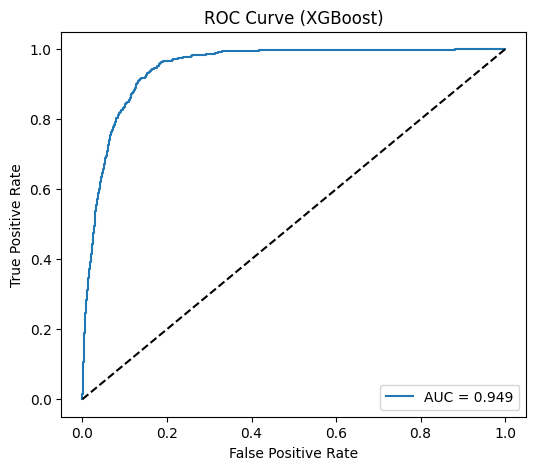

In [ ]:
#ROC/AUC and plotting it
auc = roc_auc_score(y_test, y_proba)
print("AUC:", auc)

fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (XGBoost)')
plt.legend()
plt.show()